<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [4]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [5]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [6]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [7]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [8]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

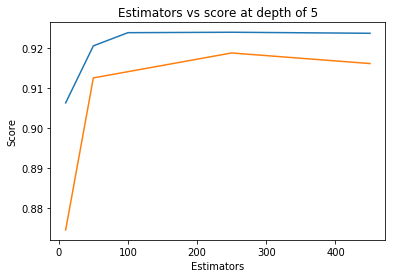

In [9]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


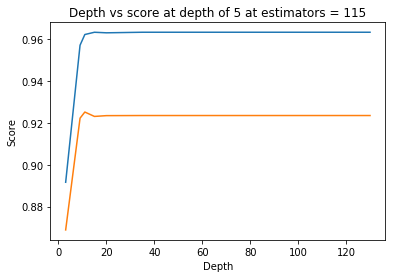

In [10]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [11]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [12]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [13]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [14]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [15]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


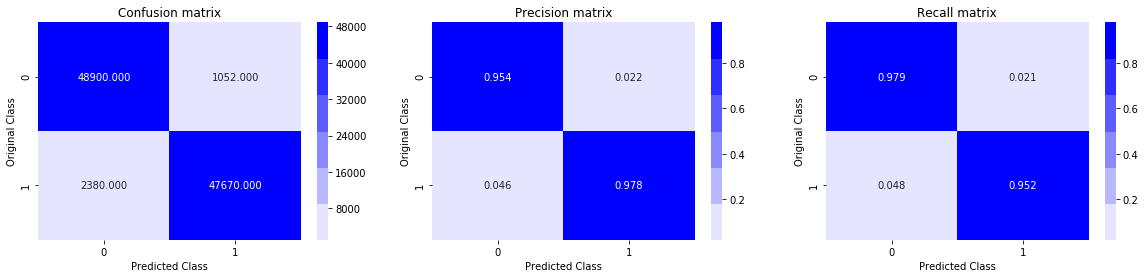

Test confusion_matrix


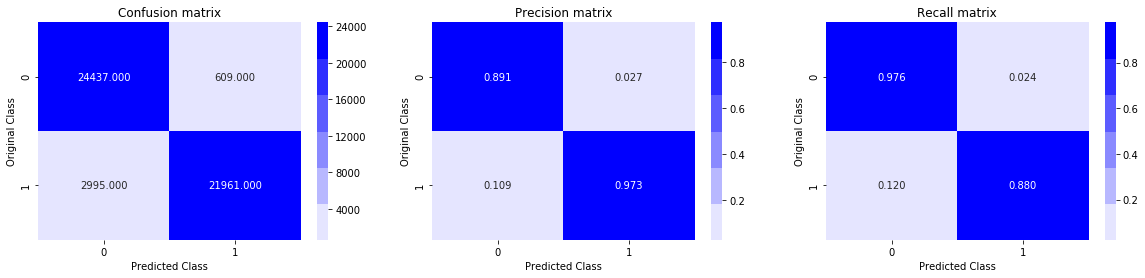

In [17]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

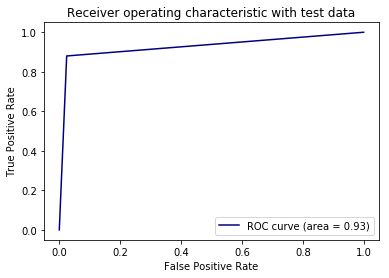

In [18]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

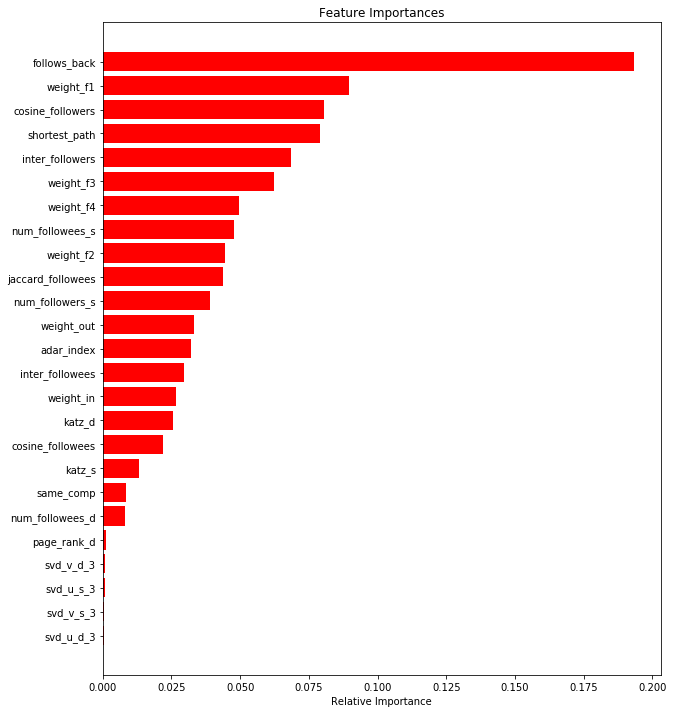

In [19]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

## Add another feature called Preferential Attachment with followers and followees data 

In [20]:
def pref_attach_followers(a,b):
  
    try:
    
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
      
          return 0
    
        sim = (len(set(train_graph.predecessors(a))*(set(train_graph.predecessors(b)))))
    
        return sim
  
    except:
    
        return 0

In [21]:
def pref_attach_followees(a,b):
  
    try:
    
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
      
          return 0
    
        sim = (len(set(train_graph.successors(a))*(set(train_graph.successors(b)))))
    
        return sim
  
    except:
    
        return 0

In [22]:
pref_attach_followers(1,456)

0

In [23]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [24]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [25]:
df_final_train['preferential_attachment_followers'] = df_final_train.apply(lambda x:pref_attach_followers(x['source_node'],x['destination_node']),axis=1)
df_final_test['preferential_attachment_followers'] = df_final_test.apply(lambda x:pref_attach_followers(x['source_node'],x['destination_node']),axis=1)


df_final_train['preferential_attachment_followees'] = df_final_train.apply(lambda x:pref_attach_followees(x['source_node'],x['destination_node']),axis=1)
df_final_test['preferential_attachment_followees'] = df_final_test.apply(lambda x:pref_attach_followees(x['source_node'],x['destination_node']),axis=1)

In [26]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0


## Add feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.

In [27]:
df_final_train['svd_u_1_dot'] = df_final_train['svd_u_s_1']*(df_final_train['svd_u_d_1'])
df_final_test['svd_u_1_dot'] = df_final_test['svd_u_s_1']*(df_final_test['svd_u_d_1'])
df_final_train['svd_v_1_dot'] = df_final_train['svd_v_s_1']*(df_final_train['svd_v_d_1'])
df_final_test['svd_v_1_dot'] = df_final_test['svd_v_s_1']*(df_final_test['svd_v_d_1'])


df_final_train['svd_u_2_dot'] = df_final_train['svd_u_s_2']*(df_final_train['svd_u_d_2'])
df_final_test['svd_u_2_dot'] = df_final_test['svd_u_s_2']*(df_final_test['svd_u_d_2'])
df_final_train['svd_v_2_dot'] = df_final_train['svd_v_s_2']*(df_final_train['svd_v_d_2'])
df_final_test['svd_v_2_dot'] = df_final_test['svd_v_s_2']*(df_final_test['svd_v_d_2'])


df_final_train['svd_u_3_dot'] = df_final_train['svd_u_s_3']*(df_final_train['svd_u_d_3'])
df_final_test['svd_u_3_dot'] = df_final_test['svd_u_s_3']*(df_final_test['svd_u_d_3'])
df_final_train['svd_v_3_dot'] = df_final_train['svd_v_s_3']*(df_final_train['svd_v_d_3'])
df_final_test['svd_v_3_dot'] = df_final_test['svd_v_s_3']*(df_final_test['svd_v_d_3'])


df_final_train['svd_u_4_dot'] = df_final_train['svd_u_s_4']*(df_final_train['svd_u_d_4'])
df_final_test['svd_u_4_dot'] = df_final_test['svd_u_s_4']*(df_final_test['svd_u_d_4'])
df_final_train['svd_v_4_dot'] = df_final_train['svd_v_s_4']*(df_final_train['svd_v_d_4'])
df_final_test['svd_v_4_dot'] = df_final_test['svd_v_s_4']*(df_final_test['svd_v_d_4'])


df_final_train['svd_u_5_dot'] = df_final_train['svd_u_s_5']*(df_final_train['svd_u_d_5'])
df_final_test['svd_u_5_dot'] = df_final_test['svd_u_s_5']*(df_final_test['svd_u_d_5'])
df_final_train['svd_v_5_dot'] = df_final_train['svd_v_s_5']*(df_final_train['svd_v_d_5'])
df_final_test['svd_v_5_dot'] = df_final_test['svd_v_s_5']*(df_final_test['svd_v_d_5'])


df_final_train['svd_u_6_dot'] = df_final_train['svd_u_s_6']*(df_final_train['svd_u_d_6'])
df_final_test['svd_u_6_dot'] = df_final_test['svd_u_s_6']*(df_final_test['svd_u_d_6'])
df_final_train['svd_v_6_dot'] = df_final_train['svd_v_s_6']*(df_final_train['svd_v_d_6'])
df_final_test['svd_v_6_dot'] = df_final_test['svd_v_s_6']*(df_final_test['svd_v_d_6'])

df_final_train['svd_u_dot'] = df_final_train['svd_u_1_dot']+df_final_train['svd_u_2_dot']+df_final_train['svd_u_3_dot']+df_final_train['svd_u_4_dot']+df_final_train['svd_u_5_dot']+df_final_train['svd_u_6_dot']
df_final_test['svd_u_dot'] = df_final_test['svd_u_1_dot']+df_final_test['svd_u_2_dot']+df_final_test['svd_u_3_dot']+df_final_test['svd_u_4_dot']+df_final_test['svd_u_5_dot']+df_final_test['svd_u_6_dot']
df_final_train['svd_v_dot'] = df_final_train['svd_v_1_dot']+df_final_train['svd_v_2_dot']+df_final_train['svd_v_3_dot']+df_final_train['svd_v_4_dot']+df_final_train['svd_v_5_dot']+df_final_train['svd_v_6_dot']
df_final_test['svd_v_dot'] = df_final_test['svd_v_1_dot']+df_final_test['svd_v_2_dot']+df_final_test['svd_v_3_dot']+df_final_test['svd_v_4_dot']+df_final_test['svd_v_5_dot']+df_final_test['svd_v_6_dot']

In [28]:
df_final_train.shape

(100002, 70)

In [29]:
df_final_train.to_csv('data_train.csv', index=True)
df_final_test.to_csv('data_test.csv', index=True)

In [30]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [31]:
df_final_train.drop(['source_node', 'destination_node','indicator_link','svd_u_1_dot','svd_v_1_dot','svd_u_2_dot','svd_v_2_dot','svd_u_3_dot','svd_v_3_dot','svd_u_4_dot','svd_v_4_dot','svd_u_5_dot','svd_v_5_dot','svd_u_6_dot','svd_v_6_dot'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link','svd_u_1_dot','svd_v_1_dot','svd_u_2_dot','svd_v_2_dot','svd_u_3_dot','svd_v_3_dot','svd_u_4_dot','svd_v_4_dot','svd_u_5_dot','svd_v_5_dot','svd_u_6_dot','svd_v_6_dot'],axis=1,inplace=True)

In [32]:
df_final_train.shape

(100002, 55)

In [33]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followers',
       'preferential_attachment_followees', 'svd_u_dot', 'svd_v_dot'],
      dtype='object')

## Tune hyperparameters for XG boost 

In [34]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from tqdm import tqdm

param = {
        'max_depth': [6,8,10,20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3,0.5,0.75,1],
        'subsample': [0.001,0.01,0.1,0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.25, 0.5,0.75, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 100],
        'n_estimators': [750,1000,1250]}

fit_params = {'eval_metric': 'logloss'}

clf = xgb.XGBClassifier()

for i in tqdm(param):
    
    model = RandomizedSearchCV(clf, param,n_jobs=-1, verbose=2, cv=2,fit_params=fit_params,scoring='f1', refit=False, random_state=42)
     
    model.fit(df_final_train,y_train)            
            

  0%|          | 0/9 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.3min finished
 11%|█         | 1/9 [10:18<1:22:25, 618.21s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished
 22%|██▏       | 2/9 [20:31<1:11:57, 616.82s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished
 33%|███▎      | 3/9 [30:45<1:01:35, 615.87s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished
 44%|████▍     | 4/9 [40:57<51:13, 614.77s/it]  

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished
 56%|█████▌    | 5/9 [51:11<40:57, 614.41s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.1min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished
 67%|██████▋   | 6/9 [1:01:21<30:39, 613.25s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished
 78%|███████▊  | 7/9 [1:11:34<20:26, 613.08s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.3min finished
 89%|████████▉ | 8/9 [1:21:50<10:13, 613.84s/it]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.3min finished
100%|██████████| 9/9 [1:32:08<00:00, 614.29s/it]


In [35]:
best_score = model.best_score_
best_params = model.best_params_

In [36]:
best_score

0.9814686677550445

In [37]:
best_params

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.4,
 'gamma': 0.25,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 1000,
 'reg_alpha': 0.01,
 'reg_lambda': 10.0,
 'subsample': 0.9}

In [38]:
clf_best = xgb.XGBClassifier(max_depth=6,colsample_bylevel=0.8,colsample_bytree=0.4,gamma=0.25,learning_rate=0.3,n_estimators=1000,reg_alpha=0.01,reg_lambda=10.0,subsample=0.9)

clf_best.fit(df_final_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.25,
       learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.01, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [39]:
pred_y_test = clf_best.predict(df_final_test)
pred_y_train = clf_best.predict(df_final_train)

In [40]:
print('Train f1 score',f1_score(y_train,pred_y_train))
print('Test f1 score',f1_score(y_test,pred_y_test))

Train f1 score 1.0
Test f1 score 0.9011996870381639


Train confusion_matrix


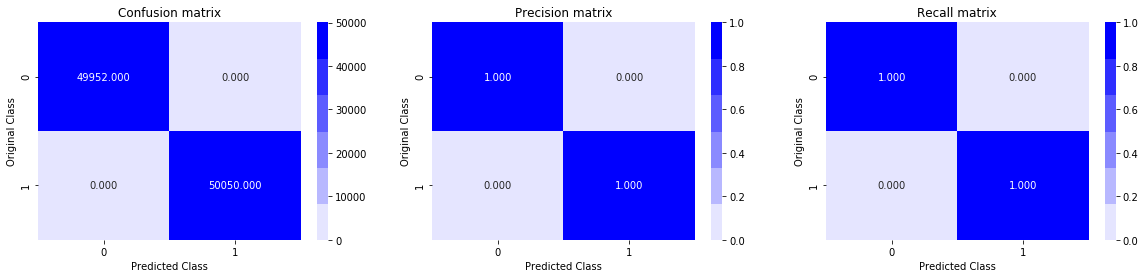

Test confusion_matrix


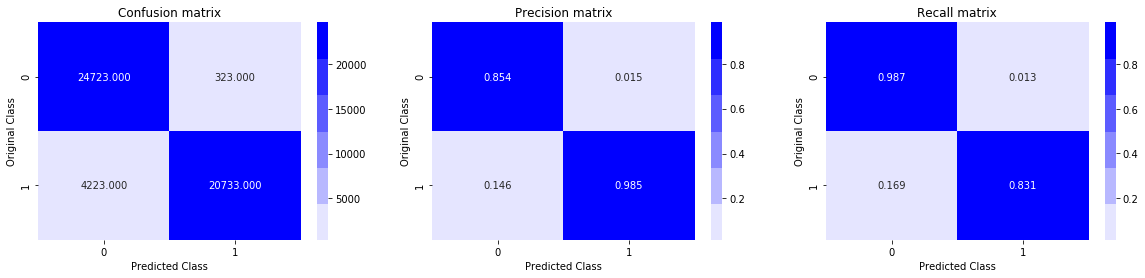

In [41]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,pred_y_train)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,pred_y_test)

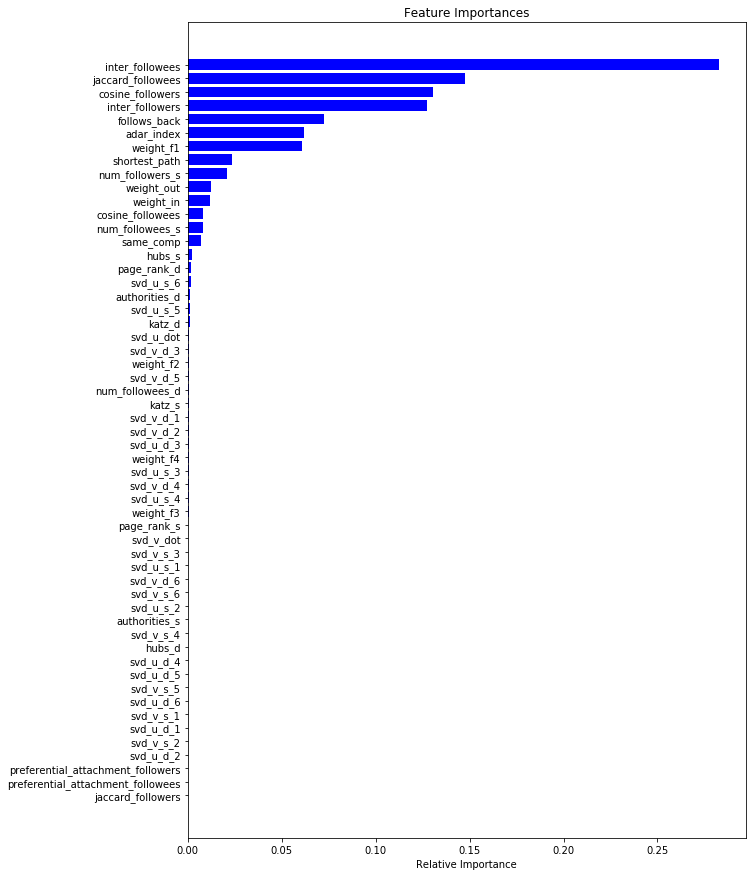

In [42]:
features = df_final_train.columns
importances = clf_best.feature_importances_
indices = (np.argsort(importances))[-55:]
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()